# VRP Problem Generator
Generate a CSV with **3 columns**: `id,lat,lon` where `id=0` indicates the **depot**.

**How to use:**
1. Run the **Parameters** cell to set up the generator.
2. Run the **Generate** cell to create `vrp_nodes.csv` in the same folder.
3. (Optional) Run the **Plot** cell to visualize the locations.
        

In [96]:
import random

# === Parameters ===
NUM_CUSTOMERS = 78          # number of customer nodes (excludes depot)
SEED = random.randint(1, 10000)
LAT_RANGE = (-7.73444, -8.00750)  # (min_lat, max_lat)
LON_RANGE = (110.20944, 110.51889)# (min_lon, max_lon)
DEMAND = (1, 5)          # (min_demand, max_demand)

# If you want to fix the depot location, set values below; otherwise keep as None
DEPOT_LAT = None            # e.g., -7.7956
DEPOT_LON = None            # e.g., 110.3695

CSV_PATH = "Problems/vrp_nodes_30.csv"  # output file name

In [97]:
# === Generate ===

import pandas as pd
from pathlib import Path

random.seed(SEED)

lat_min, lat_max = LAT_RANGE
lon_min, lon_max = LON_RANGE
demand_min, demand_max = DEMAND

# Create depot (id=0)
if DEPOT_LAT is None:
    depot_lat = random.uniform(lat_min, lat_max)
else:
    depot_lat = float(DEPOT_LAT)

if DEPOT_LON is None:
    depot_lon = random.uniform(lon_min, lon_max)
else:
    depot_lon = float(DEPOT_LON)

rows = []
rows.append({'id': 0, 'lat': depot_lat, 'lon': depot_lon})

# Create customers (id=1..N)
for cid in range(1, NUM_CUSTOMERS + 1):
    lat = random.uniform(lat_min, lat_max)
    lon = random.uniform(lon_min, lon_max)
    demand = random.randint(demand_min, demand_max)
    rows.append({'id': cid, 'lat': lat, 'lon': lon, 'demand': demand})

df = pd.DataFrame(rows, columns=['id','lat','lon','demand'])

out_path = Path(CSV_PATH).resolve()
df.to_csv(out_path, index=False)
print(f"Saved {len(df)} rows to: {out_path}")
df.head()


Saved 79 rows to: D:\Archive\.projects\NT-NSGA-II\Problems\vrp_nodes_30.csv


,id,lat,lon,demand
0,0,-7.805230,110.466963,NaN
1,1,-7.937962,110.340683,5.0
2,2,-7.811146,110.497077,5.0
3,3,-7.851754,110.275006,4.0
4,4,-7.834285,110.460544,3.0


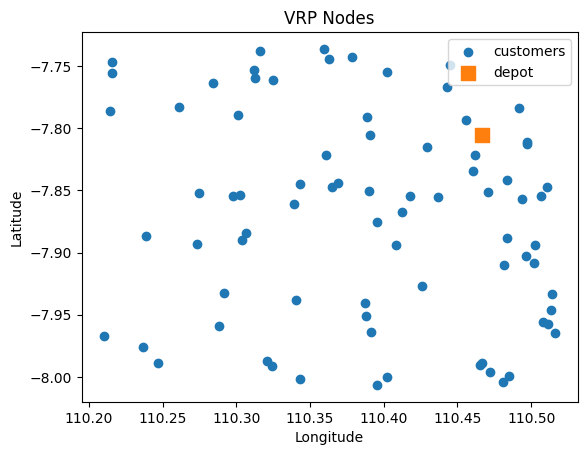

In [98]:
# === Plot (optional) ===
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(CSV_PATH)

plt.figure()
depot = df[df['id'] == 0]
customers = df[df['id'] != 0]

plt.scatter(customers['lon'], customers['lat'], label='customers')
plt.scatter(depot['lon'], depot['lat'], marker='s', s=100, label='depot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('VRP Nodes')
plt.legend()
plt.show()
